<h1 align = "center">Stock Market Prediction and Foecasting Using Stacked LSTM</h1>

<br>
<h3 align="center">Author - Naman Talwar</h3>

<br>


<h3>Importing Libraries</h3>

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [114]:
url="https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"
dataset_train=pd.read_csv(url)
training_set= dataset_train.iloc[:,1:2].values

In [115]:
dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [116]:
data_close=dataset_train["Close"]
data_close

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
5       234.60
6       234.90
7       235.05
8       236.60
9       233.95
10      222.65
11      216.00
12      222.00
13      222.95
14      221.05
15      222.40
16      223.70
17      236.70
18      234.30
19      236.00
20      234.55
21      233.35
22      237.05
23      231.00
24      235.45
25      240.55
26      245.15
27      243.00
28      239.35
29      237.55
         ...  
2005    120.50
2006    117.60
2007    117.75
2008    118.15
2009    117.00
2010    116.45
2011    116.70
2012    111.50
2013    113.05
2014    108.85
2015    110.10
2016    111.25
2017    114.15
2018    112.55
2019    113.90
2020    112.30
2021    112.85
2022    112.10
2023    114.05
2024    116.50
2025    118.30
2026    117.30
2027    116.05
2028    116.60
2029    118.25
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

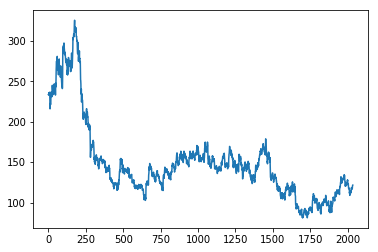

In [117]:
plt.plot(data_close)

Since LSTM are sensitive to the scale of the data, so we apply MinMax Scaler to transform our values between 0 and 1
<br>
<br>
<h3>Data Normalization</h3>
<br>

In [118]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range = (0,1))
data_close = scaler.fit_transform(np.array(data_close).reshape(-1,1))
data_close.shape

(2035, 1)

In [119]:
print(data_close)

[[0.62418301]
 [0.62214052]
 [0.62622549]
 ...
 [0.1621732 ]
 [0.16319444]
 [0.16584967]]


<br>
<h3>Train and Test Split</h3>

In [120]:
training_size = int(len(data_close)*0.75)
test_size = len(data_close) - training_size
train_data, test_data= data_close[0:training_size,:], data_close[training_size:len(data_close),:1]

In [121]:
def create_dataset(dataset, time_step = 1):
    datax,datay= [],[]
    for i in range (len(dataset)-time_step - 1):
        a = dataset[i:(i+time_step),0]
        datax.append(a)
        datay.append(dataset[i+time_step,0])
    return np.array(datax), np.array(datay)

In [122]:
time_step=100
x_train,y_train = create_dataset(train_data,time_step)
x_test,y_test = create_dataset(test_data,time_step)

In [123]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [124]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
model = Sequential()
model.add(LSTM(50,return_sequences =True, input_shape = (100,1)))
model.add(LSTM(50,return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss= 'mean_squared_error', optimizer ='adam')
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_22 (LSTM)               (None, 100, 50)           10400     
_________________________________________________________________
lstm_23 (LSTM)               (None, 100, 50)           20200     
_________________________________________________________________
lstm_24 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [125]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_22 (LSTM)               (None, 100, 50)           10400     
_________________________________________________________________
lstm_23 (LSTM)               (None, 100, 50)           20200     
_________________________________________________________________
lstm_24 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [126]:
model.fit(x_train,y_train, validation_data = (x_test, y_test), epochs = 100,batch_size = 64, verbose = 1)

Train on 1425 samples, validate on 408 samples
Epoch 1/100
1425/1425 [==============================] - 9s 6ms/step - loss: 0.0277 - val_loss: 0.0079
Epoch 2/100
1425/1425 [==============================] - 6s 4ms/step - loss: 0.0031 - val_loss: 9.8795e-04
Epoch 3/100
1425/1425 [==============================] - 6s 4ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 4/100
1425/1425 [==============================] - 5s 3ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 5/100
1425/1425 [==============================] - 5s 3ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 6/100
1425/1425 [==============================] - 5s 3ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 7/100
1425/1425 [==============================] - 6s 4ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 8/100
1425/1425 [==============================] - 6s 4ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 9/100
1425/1425 [==============================] - 6s 4ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 10/100
1425/1425

1425/1425 [==============================] - 4s 3ms/step - loss: 2.7471e-04 - val_loss: 2.3913e-04
Epoch 75/100
1425/1425 [==============================] - 4s 3ms/step - loss: 3.1756e-04 - val_loss: 2.4354e-04
Epoch 76/100
1425/1425 [==============================] - 4s 3ms/step - loss: 3.5160e-04 - val_loss: 3.1896e-04
Epoch 77/100
1425/1425 [==============================] - 4s 3ms/step - loss: 3.3009e-04 - val_loss: 3.2905e-04
Epoch 78/100
1425/1425 [==============================] - 4s 3ms/step - loss: 2.8054e-04 - val_loss: 2.6398e-04
Epoch 79/100
1425/1425 [==============================] - 4s 3ms/step - loss: 2.7004e-04 - val_loss: 2.9922e-04
Epoch 80/100
1425/1425 [==============================] - 4s 3ms/step - loss: 2.5745e-04 - val_loss: 2.2907e-04
Epoch 81/100
1425/1425 [==============================] - 4s 3ms/step - loss: 2.6309e-04 - val_loss: 2.5801e-04
Epoch 82/100
1425/1425 [==============================] - 4s 3ms/step - loss: 2.4882e-04 - val_loss: 2.3214e-04
Epoch

In [128]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [129]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [131]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

162.19899405023375

In [132]:
math.sqrt(mean_squared_error(y_test, test_predict))

106.25082319488531

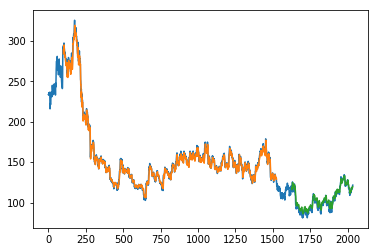

In [133]:
look_back = 100
trainPredictPlot=np.empty_like(data_close)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict

testPredictPlot = np.empty_like(data_close)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data_close)-1, :] =test_predict

plt.plot(scaler.inverse_transform(data_close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

<h3>Predict the Stock Price for the next 30 Days</h3>

In [134]:
len(test_data), x_test.shape

(509, (408, 100, 1))

In [135]:
x_input = test_data[409:].reshape(1,-1)
x_input.shape

(1, 100)

In [136]:
temp_input =list(x_input)
temp_input = temp_input[0].tolist()

In [137]:
lst_output= []
n_steps = 100
nextNumberOfDays = 30
i=0

while(i<nextNumberOfDays):
    
    if(len(temp_input)>100):
        x_input = np.array(temp_input[1:])
        print("{} day input {} ".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape(1, n_steps, 1)
        yhat = model.predict(x_input, verbose= 0)
        print("{} day output {} ".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1,n_steps,1))
        yhat = model.predict(x_input,verbose= 0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
        
        
print(lst_output)

[0.16633046]
101
1 day input [0.13848039 0.14011438 0.13888889 0.13541667 0.14011438 0.1380719
 0.13071895 0.13071895 0.12867647 0.11846405 0.14644608 0.14808007
 0.15910948 0.15992647 0.15788399 0.16441993 0.17892157 0.17933007
 0.19260621 0.20812908 0.18974673 0.18055556 0.18239379 0.17708333
 0.17810458 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399
 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641
 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876
 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536
 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961
 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412
 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562
 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268
 0.15196078 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745
 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967
 0.12806373 0.13031046 0.12724673 0

10 day output [[0.17445931]] 
11 day input [0.14644608 0.14808007 0.15910948 0.15992647 0.15788399 0.16441993
 0.17892157 0.17933007 0.19260621 0.20812908 0.18974673 0.18055556
 0.18239379 0.17708333 0.17810458 0.18055556 0.17810458 0.17851307
 0.19607843 0.18913399 0.18954248 0.19403595 0.19444444 0.20200163
 0.19771242 0.19934641 0.19873366 0.1997549  0.2128268  0.21568627
 0.20445261 0.21772876 0.21098856 0.21425654 0.19750817 0.18811275
 0.17851307 0.17381536 0.16033497 0.16564542 0.17116013 0.17422386
 0.18035131 0.17401961 0.16278595 0.16973039 0.17810458 0.17034314
 0.16830065 0.17279412 0.17544935 0.18382353 0.19138072 0.18913399
 0.19097222 0.17238562 0.16830065 0.1693219  0.17177288 0.16156046
 0.14971405 0.1503268  0.15196078 0.14726307 0.14501634 0.14603758
 0.12479575 0.13112745 0.11397059 0.1190768  0.12377451 0.13562092
 0.12908497 0.13459967 0.12806373 0.13031046 0.12724673 0.13521242
 0.14522059 0.15257353 0.14848856 0.14338235 0.14562908 0.15236928
 0.15400327 0.14971

18 day output [[0.17897327]] 
19 day input [0.19260621 0.20812908 0.18974673 0.18055556 0.18239379 0.17708333
 0.17810458 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399
 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641
 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876
 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536
 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961
 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412
 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562
 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268
 0.15196078 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745
 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967
 0.12806373 0.13031046 0.12724673 0.13521242 0.14522059 0.15257353
 0.14848856 0.14338235 0.14562908 0.15236928 0.15400327 0.14971405
 0.1621732  0.16319444 0.16584967 0.16633046 0.16813873 0.16924299
 0.17006859 0.170766

26 day output [[0.1824261]] 
27 day input [0.17810458 0.17851307 0.19607843 0.18913399 0.18954248 0.19403595
 0.19444444 0.20200163 0.19771242 0.19934641 0.19873366 0.1997549
 0.2128268  0.21568627 0.20445261 0.21772876 0.21098856 0.21425654
 0.19750817 0.18811275 0.17851307 0.17381536 0.16033497 0.16564542
 0.17116013 0.17422386 0.18035131 0.17401961 0.16278595 0.16973039
 0.17810458 0.17034314 0.16830065 0.17279412 0.17544935 0.18382353
 0.19138072 0.18913399 0.19097222 0.17238562 0.16830065 0.1693219
 0.17177288 0.16156046 0.14971405 0.1503268  0.15196078 0.14726307
 0.14501634 0.14603758 0.12479575 0.13112745 0.11397059 0.1190768
 0.12377451 0.13562092 0.12908497 0.13459967 0.12806373 0.13031046
 0.12724673 0.13521242 0.14522059 0.15257353 0.14848856 0.14338235
 0.14562908 0.15236928 0.15400327 0.14971405 0.1621732  0.16319444
 0.16584967 0.16633046 0.16813873 0.16924299 0.17006859 0.1707664
 0.1714025  0.17201327 0.1726189  0.17322826 0.17384279 0.17445931
 0.17507283 0.17567818 0

In [138]:
day_new= np.arange(1,101)
day_pred = np.arange(101,131)

In [139]:
df3= data_close.tolist()
df3.extend(lst_output)

In [140]:
len(data_close)

2035

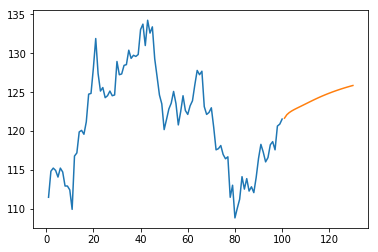

In [141]:
plt.plot(day_new,scaler.inverse_transform(data_close[1935:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))